# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

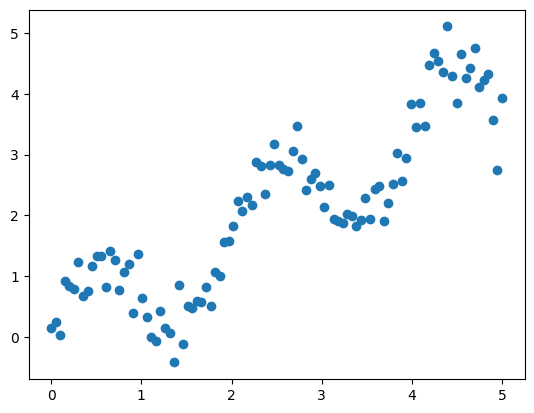

In [3]:
plt.scatter(x,y)

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [5]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [6]:
regr_lin.fit(X,y)

LinearRegression()

0.49569869383979076


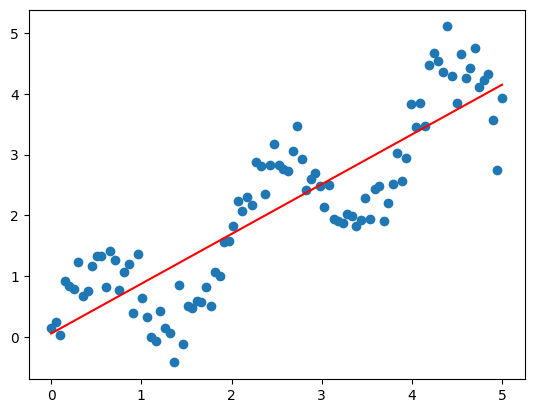

In [7]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [8]:
print(x.shape)

(100,)


In [9]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [10]:
regr_poly = LinearRegression()

In [11]:
regr_poly.fit(X_poly, y)

LinearRegression()

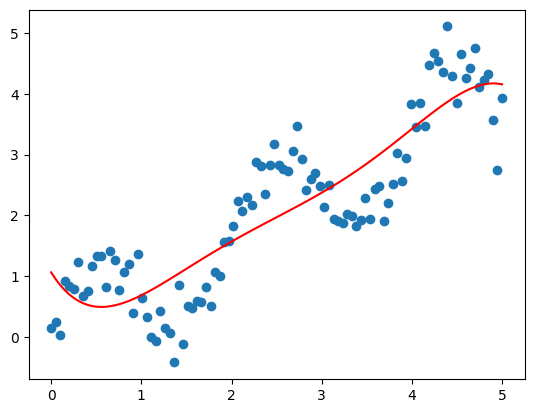

In [12]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [13]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-2.37961467  3.12353195 -1.38168793  0.28149924 -0.02122226]
interception:  1.0605423874444089


In [14]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([1.06054239, 0.94815104, 0.85065189, 0.76704186, 0.69636012,
       0.63768732, 0.59014468, 0.55289324, 0.52513293, 0.50610182,
       0.4950752 , 0.49136482, 0.49431801, 0.50331684, 0.5177773 ,
       0.53714847, 0.56091165, 0.58857957, 0.6196955 , 0.65383247,
       0.69059236, 0.72960516, 0.77052805, 0.81304458, 0.85686388,
       0.90171977, 0.94736994, 0.99359513, 1.04019826, 1.08700363,
       1.13385606, 1.18062005, 1.22717895, 1.27343415, 1.31930418,
       1.36472395, 1.40964384, 1.45402892, 1.49785808, 1.54112321,
       1.58382835, 1.62598886, 1.66763058, 1.70878902, 1.74950846,
       1.78984119, 1.82984661, 1.86959044, 1.90914383, 1.9485826 ,
       1.98798631, 2.0274375 , 2.06702083, 2.10682222, 2.14692804,
       2.18742425, 2.2283956 , 2.26992476, 2.31209149, 2.35497181,
       2.39863715, 2.44315355, 2.48858076, 2.53497146, 2.5823704 ,
       2.63081357, 2.68032736, 2.73092769, 2.78261926, 2.8353946 ,
       2.88923334, 2.9441013 , 2.99994968, 3.05671421, 3.11431

In [15]:
regr_poly.predict(X_poly)

array([1.06054239, 0.94815104, 0.85065189, 0.76704186, 0.69636012,
       0.63768732, 0.59014468, 0.55289324, 0.52513293, 0.50610182,
       0.4950752 , 0.49136482, 0.49431801, 0.50331684, 0.5177773 ,
       0.53714847, 0.56091165, 0.58857957, 0.6196955 , 0.65383247,
       0.69059236, 0.72960516, 0.77052805, 0.81304458, 0.85686388,
       0.90171977, 0.94736994, 0.99359513, 1.04019826, 1.08700363,
       1.13385606, 1.18062005, 1.22717895, 1.27343415, 1.31930418,
       1.36472395, 1.40964384, 1.45402892, 1.49785808, 1.54112321,
       1.58382835, 1.62598886, 1.66763058, 1.70878902, 1.74950846,
       1.78984119, 1.82984661, 1.86959044, 1.90914383, 1.9485826 ,
       1.98798631, 2.0274375 , 2.06702083, 2.10682222, 2.14692804,
       2.18742425, 2.2283956 , 2.26992476, 2.31209149, 2.35497181,
       2.39863715, 2.44315355, 2.48858076, 2.53497146, 2.5823704 ,
       2.63081357, 2.68032736, 2.73092769, 2.78261926, 2.8353946 ,
       2.88923334, 2.9441013 , 2.99994968, 3.05671421, 3.11431

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [16]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [17]:
sigma = 0.3

In [18]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [19]:
regr_rbf = LinearRegression()

In [20]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

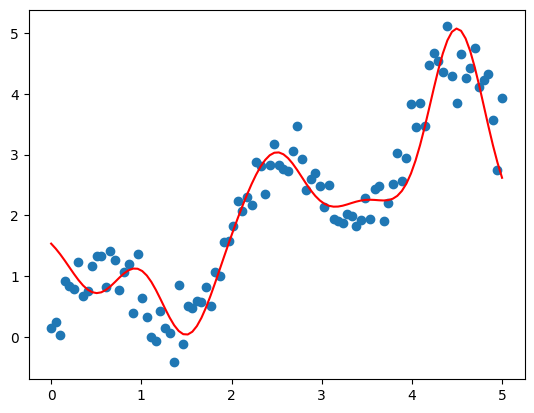

In [21]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [22]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-1.07603005 -1.76867901  1.24081747  0.43557201  3.27225078]
interception:  1.8022897389295103


#### Comparison

In [23]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

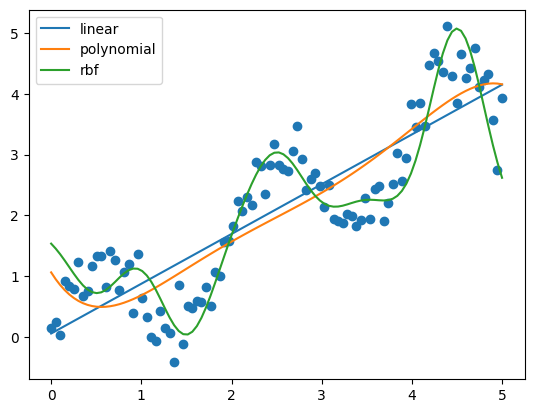

In [25]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [26]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.49569869383979076


In [27]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.446038614877709


In [28]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.2386621677703791
